<a href="https://www.kaggle.com/code/nasser77/port-traffic-data-analysis?scriptVersionId=165417730" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Import necessary libraries
import numpy as np 
import pandas as pd 
from IPython.display import display
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/port-traffic-q3-2023/Port traffic Q3 2023.CSV


In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/kaggle/input/port-traffic-q3-2023/Port traffic Q3 2023.CSV')
# Display the first 10 rows of the DataFrame
df.head(10)

,اسم المنفذ,التاريخ,اليوم,الساعة,الاتجاه,عدد الحركات
0,البطحاء,2019-01-01,الثلاثاء,0,قدوم,8
1,البطحاء,2019-01-01,الثلاثاء,1,قدوم,24
2,البطحاء,2019-01-01,الثلاثاء,2,قدوم,46
3,البطحاء,2019-01-01,الثلاثاء,3,قدوم,7
4,البطحاء,2019-01-01,الثلاثاء,4,قدوم,3
5,البطحاء,2019-01-01,الثلاثاء,7,قدوم,100
6,البطحاء,2019-01-01,الثلاثاء,7,مغادرة,56
7,البطحاء,2019-01-01,الثلاثاء,8,قدوم,159
8,البطحاء,2019-01-01,الثلاثاء,8,مغادرة,138
9,البطحاء,2019-01-01,الثلاثاء,9,قدوم,132


In [3]:
# Convert the 'التاريخ' column to datetime format
df['التاريخ'] = pd.to_datetime(df['التاريخ'])

In [4]:
# Define start and end dates for filtering
start_date='2023-01-01'
end_date='2024-01-01'

In [5]:
# Filter DataFrame based on date range
filtered_df = df[(df['التاريخ'] >= start_date) & (df['التاريخ'] <= end_date)]
# Further filter for movements greater than 200
filtered_df_greater_than_200 = filtered_df[filtered_df['عدد الحركات'] > 200]
# Display the filtered DataFrame
display(filtered_df_greater_than_200)

,اسم المنفذ,التاريخ,اليوم,الساعة,الاتجاه,عدد الحركات
68336,البطحاء,2023-01-18,الاربعاء,8,مغادرة,225
68720,البطحاء,2023-01-26,الخميس,8,مغادرة,224
68768,البطحاء,2023-01-27,الجمعة,8,مغادرة,231
69392,البطحاء,2023-02-09,الخميس,8,مغادرة,222
69440,البطحاء,2023-02-10,الجمعة,8,مغادرة,205
69536,البطحاء,2023-02-12,الاحد,8,مغادرة,246
69680,البطحاء,2023-02-15,الاربعاء,8,مغادرة,218
69776,البطحاء,2023-02-17,الجمعة,8,مغادرة,205
70016,البطحاء,2023-02-22,الاربعاء,8,مغادرة,256
70112,البطحاء,2023-02-24,الجمعة,8,مغادرة,241


In [6]:
# Calculate and display daily traffic
daily_traffic = df.groupby('التاريخ')['عدد الحركات'].sum()
most_active_day = daily_traffic.idxmax()
max_traffic_day_count = daily_traffic.max()
display(f"The most active day is {most_active_day.strftime('%Y-%m-%d')} with {max_traffic_day_count} movements.")

'The most active day is 2023-06-21 with 9974 movements.'

In [7]:
# Convert 'الساعة' column to hour format
df['الساعة'] = pd.to_datetime(df['الساعة'], format='%H').dt.hour
# Calculate and display hourly traffic
hourly_traffic = df.groupby('الساعة')['عدد الحركات'].sum()
display(hourly_traffic)

الساعة
0     258785
1     252228
2     195146
3     149829
4     131584
5     132497
6     138328
7     277730
8     593751
9     713808
10    752191
11    699570
12    625097
13    625202
14    516016
15    454849
16    651556
17    646523
18    560271
19    538740
20    510815
21    457818
22    360780
23    244639
Name: عدد الحركات, dtype: int64

In [8]:
# Find the most active hour
most_active_hour = hourly_traffic.idxmax()
# Extract records for the most active day and hour
most_active_record = df[(df['التاريخ'] == most_active_day.strftime('%Y-%m-%d')) & (df['الساعة'] == most_active_hour)]
# Display information for the most active day and hour
display(f"Information for the most active day ({most_active_day.strftime('%Y-%m-%d')}) and hour ({most_active_hour}):")
display(most_active_record)

'Information for the most active day (2023-06-21) and hour (10):'

,اسم المنفذ,التاريخ,اليوم,الساعة,الاتجاه,عدد الحركات
75708,البطحاء,2023-06-21,الاربعاء,10,قدوم,91
75709,البطحاء,2023-06-21,الاربعاء,10,مغادرة,193
123036,الحديثة,2023-06-21,الاربعاء,10,قدوم,28
123037,الحديثة,2023-06-21,الاربعاء,10,مغادرة,32
179092,الخفجي,2023-06-21,الاربعاء,10,قدوم,16
179093,الخفجي,2023-06-21,الاربعاء,10,مغادرة,53
188027,الدره,2023-06-21,الاربعاء,10,مغادرة,5
204849,الربع الخالي,2023-06-21,الاربعاء,10,قدوم,8
204850,الربع الخالي,2023-06-21,الاربعاء,10,مغادرة,17
249090,الرقعي,2023-06-21,الاربعاء,10,قدوم,18


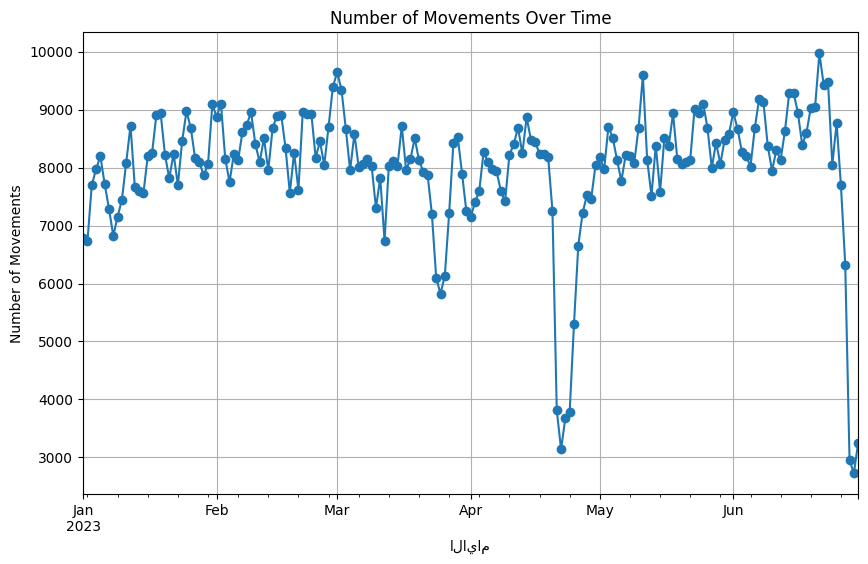

In [9]:
# Plot the number of movements over time
plt.figure(figsize=(10, 6))
filtered_df.groupby('التاريخ')['عدد الحركات'].sum().plot(kind='line', marker='o', linestyle='-')
plt.title('Number of Movements Over Time')
plt.xlabel('الايام')
plt.ylabel('Number of Movements')
plt.grid(True)
plt.show()